### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Random Sampling Imputation - Numerical

#### Load the dataset

In [2]:
df = pd.read_csv(r'data/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

#### Train Test Split

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

In [8]:
# Creating new column for imputing 
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [9]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [10]:
X_test.head()

,Age,Fare,Age_Imputed
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


In [11]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_Imputed, Length: 140, dtype: float64

In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 1.  , 36.  , 33.  ,  2.  , 51.  , 42.  , 35.  , 36.  , 54.  ,
       17.  , 24.  , 21.  , 41.  , 32.  , 54.  , 19.  , 45.  , 36.  ,
       26.  , 38.  , 33.  , 22.  , 30.  , 25.  , 33.  , 30.  , 24.  ,
       25.  , 26.  , 20.  , 34.  , 26.  , 27.  , 42.  , 33.  ,  2.  ,
       34.  , 25.  , 16.  , 31.  ,  0.83, 24.  , 44.  , 32.  , 15.  ,
       58.  , 55.  , 18.  , 29.  , 36.  , 16.  ,  1.  , 21.  , 22.  ,
       25.  , 28.  , 29.  , 17.  , 36.  , 28.  , 27.  , 18.  , 48.  ,
       22.  , 28.5 , 39.  , 25.  , 16.  , 28.  , 31.  , 59.  , 21.  ,
       33.  , 70.5 , 33.  , 51.  , 37.  , 39.  , 30.  , 50.  , 55.5 ,
       19.  , 54.  , 32.5 ,  9.  , 31.  , 38.  , 25.  , 19.  , 43.  ,
       47.  , 47.  ,  6.  , 52.  , 27.  ,  4.  , 22.  , 14.5 , 34.  ,
       24.  ,  6.  , 44.  , 28.  , 54.  , 22.  , 44.  , 54.  , 27.  ,
       33.  , 44.  , 14.  , 35.  , 28.  , 33.  , 19.  , 19.  , 52.  ,
       21.  , 26.  , 15.  , 54.  , 32.  , 28.  , 25.  , 28.  , 42.  ,
       20.  , 28.  ,

In [13]:
# Filling the missing values in Age_Imputed column with the values from Age column which are not missing
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [14]:
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [15]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [16]:
X_test.head()

,Age,Fare,Age_Imputed
709,NaN,15.2458,31.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


#### Distribution of Age vs Age_Imputed

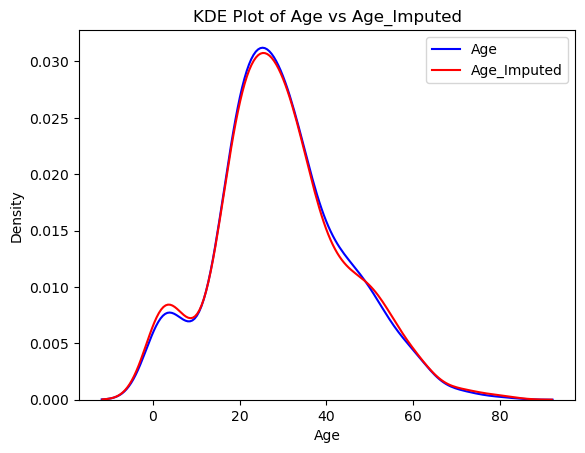

In [17]:
sns.kdeplot(data=X_train, x='Age', color='blue', label='Age');
sns.kdeplot(data=X_train, x='Age_Imputed', color='red', label='Age_Imputed');
plt.legend()
plt.title('KDE Plot of Age vs Age_Imputed')
plt.show();

* There is no change in the distribution of the Age and Age_Imputed columns

#### Variance of Age vs Age_Imputed

In [18]:
print("Variance of Age column: ", X_train['Age'].var())
print("Variance of Age_Imputed column: ", X_train['Age_Imputed'].var())

Variance of Age column:  210.2517072477438
Variance of Age_Imputed column:  223.21653255819453


* Variance is also almost same.

#### Covariance of Age vs Age_Imputed

In [19]:
X_train[['Fare', 'Age', 'Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2700.831981,71.580633,48.780170
Age,71.580633,210.251707,210.251707
Age_Imputed,48.780170,210.251707,223.216533


* Covariance seems to be have changed b/w Fare and Age, Age_Imputed

#### Outliers

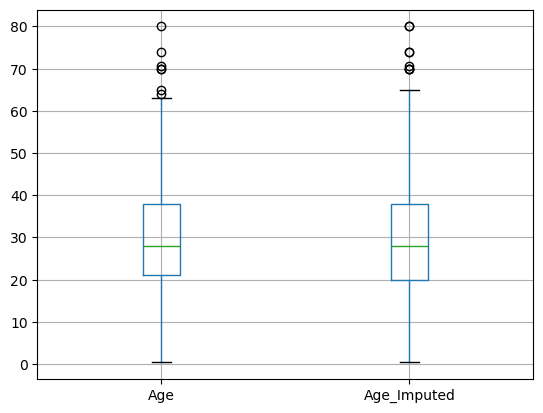

In [20]:
X_train[['Age', 'Age_Imputed']].boxplot();

* Almost no change in the outliers as well.

Random sampling imputation is useful because it preserves the original distribution of the data, avoiding the bias that can come from mean or median imputation. However, by default, random sampling is non-deterministic, meaning each time you run the imputation, it may fill missing values with different randomly selected entries.

In production environments, this lack of consistency can lead to:
* Inconsistent model predictions across runs.
* Difficulties in debugging or model validation.
* Data drift in pipelines over time if imputation varies between training and serving.

To ensure reproducibility and consistency, especially during model deployment and inference, it's important to control the randomness using the random_state parameter.

In [21]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'].iloc[0]))
sampled_value

53    29.0
Name: Age, dtype: float64

### Random Sampling Imputation - Categorical

#### Load the dataset

In [22]:
df = pd.read_csv(r'data/house-train.csv', usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [23]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

#### Train Test Split

In [25]:
X = df
y = df['SalePrice']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 3), (292, 3), (1168,), (292,))

In [28]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [30]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,Gd
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,TA,TA
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd


In [31]:
X_test.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
892,NaN,TA,154500,TA,Gd
1105,TA,TA,325000,TA,TA
413,Gd,TA,115000,TA,Gd
522,Gd,TA,159000,TA,Gd
1036,Ex,TA,315500,TA,Ex


#### Checking frequencies/class balances 

In [32]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951087,0.949486
Fa,0.032609,0.033390
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.002568


* There is no significant change in the proportions of original and imputed columns.

In [33]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.491143,0.485445
TA,0.405797,0.410959
Fa,0.043478,0.043664
Ex,0.033816,0.032534
Po,0.025765,0.027397


* There is a significant change in the proportion of `Fa` in original vs imputed columns.

#### Distributions before and after

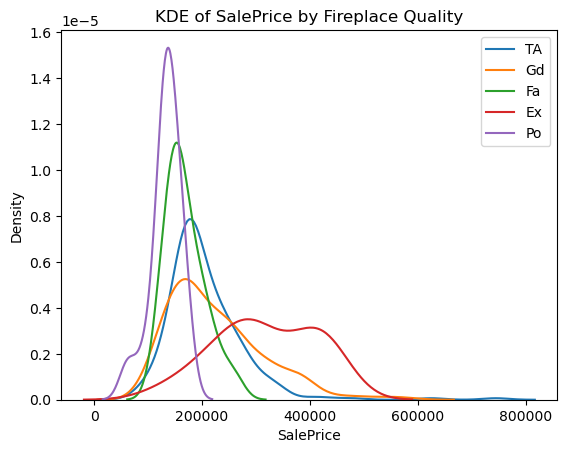

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(data=X_train[X_train['FireplaceQu'] == category], x='SalePrice', label=category)

plt.title("KDE of SalePrice by Fireplace Quality")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

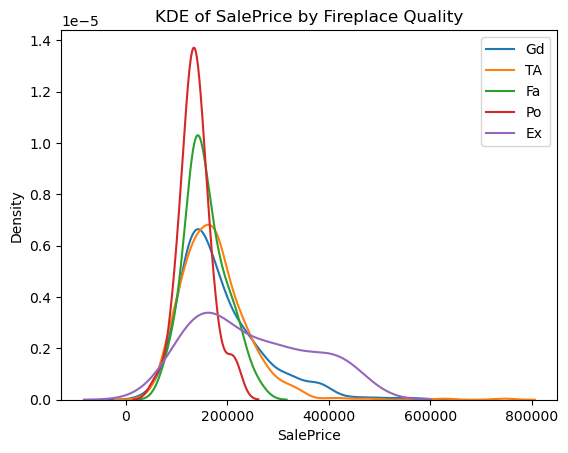

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(data=X_train[X_train['FireplaceQu_imputed'] == category], x='SalePrice', label=category)

plt.title("KDE of SalePrice by Fireplace Quality")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

* The same change can also be seen in the density plot as well.